In [1]:
from prov.model import ProvDocument

In [2]:
doc = ProvDocument()

# namepaces
doc.add_namespace('prov', uri='http://www.w3.org/ns/prov#')
doc.add_namespace('provone', uri='http://purl.dataone.org/provone/2015/01/15/ontology#')
doc.add_namespace('dcterms', uri='http://purl.org/dc/terms/')
doc.set_default_namespace(uri='http://purl.org/roocs/prov#')

# objects
project_cds = doc.agent(':Copernicus_CDS', {
            'prov:type': 'prov:Organization',
            'dcterms:title': 'Copernicus Climate Data Store',
        })
workflow = doc.entity(":workflow", {"prov:type": "provone:Workflow"})
inputs = doc.entity(":inputs", {
    "prov:type": "provone:Data",
    "prov:value": "c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest",
})
outputs_sub_a = doc.entity(":outputs_sub_a", {
    "prov:type": "provone:Data",
    "prov:value": "tas_day_EC-EARTH_historical_r1i1p1_18600101-19201230.nc",
})
outputs_sub_b = doc.entity(":outputs_sub_b", {
    "prov:type": "provone:Data",
    "prov:value": "tas_day_EC-EARTH_historical_r1i1p1_18700101-19101230.nc",
})
outputs = doc.entity(":output", {
    "prov:type": "provone:Data",
    "prov:value": "tas_day_EC-EARTH_historical_r1i1p1_18800101-19001230.nc",
})
daops = doc.agent(":daops", {
            "prov:type": "prov:SoftwareAgent",
            "dcterms:source": "https://github.com/roocs/daops/releases/tag/v2.0.0",
        })
rook = doc.agent(":rook", {
            "prov:type": "prov:SoftwareAgent",
            "dcterms:source": "https://github.com/roocs/rook/releases/tag/v2.0.0",
        })
orchestrate = doc.activity(":orchestrate", other_attributes={
    # "prov:type": "provone:Program",
})
sub_a = doc.activity(":subset_a", other_attributes={
    # "prov:type": "provone:Program",
    ":time": "1860/1920",
})
sub_b = doc.activity(":subset_b", other_attributes={
    # "prov:type": "provone:Program",
    ":time": "1870/1910",
})
sub_c = doc.activity(":subset_c", other_attributes={
    # "prov:type": "provone:Program",
    ":time": "1880/1900",
})

# relations
doc.wasAttributedTo(rook, project_cds)
doc.wasAssociatedWith(orchestrate, agent=rook, plan=workflow)
doc.wasAssociatedWith(sub_a, agent=daops, plan=workflow)
doc.wasAssociatedWith(sub_b, agent=daops, plan=workflow)
doc.wasAssociatedWith(sub_c, agent=daops, plan=workflow)
doc.wasDerivedFrom(outputs_sub_a, inputs, sub_a)
doc.wasDerivedFrom(outputs_sub_b, outputs_sub_a, sub_b)
doc.wasDerivedFrom(outputs, outputs_sub_b, sub_c)

<ProvDerivation: (output, outputs_sub_b)>

In [3]:
print(doc.get_provn())

document
  default <http://purl.org/roocs/prov#>
  prefix provone <http://purl.dataone.org/provone/2015/01/15/ontology#>
  prefix dcterms <http://purl.org/dc/terms/>
  
  agent(Copernicus_CDS, [prov:type="prov:Organization", dcterms:title="Copernicus Climate Data Store"])
  entity(workflow, [prov:type="provone:Workflow"])
  entity(inputs, [prov:type="provone:Data", prov:value="c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest"])
  entity(outputs_sub_a, [prov:type="provone:Data", prov:value="tas_day_EC-EARTH_historical_r1i1p1_18600101-19201230.nc"])
  entity(outputs_sub_b, [prov:type="provone:Data", prov:value="tas_day_EC-EARTH_historical_r1i1p1_18700101-19101230.nc"])
  entity(output, [prov:type="provone:Data", prov:value="tas_day_EC-EARTH_historical_r1i1p1_18800101-19001230.nc"])
  agent(daops, [prov:type="prov:SoftwareAgent", dcterms:source="https://github.com/roocs/daops/releases/tag/v2.0.0"])
  agent(rook, [prov:type="prov:SoftwareAgent", dcterms:source="h

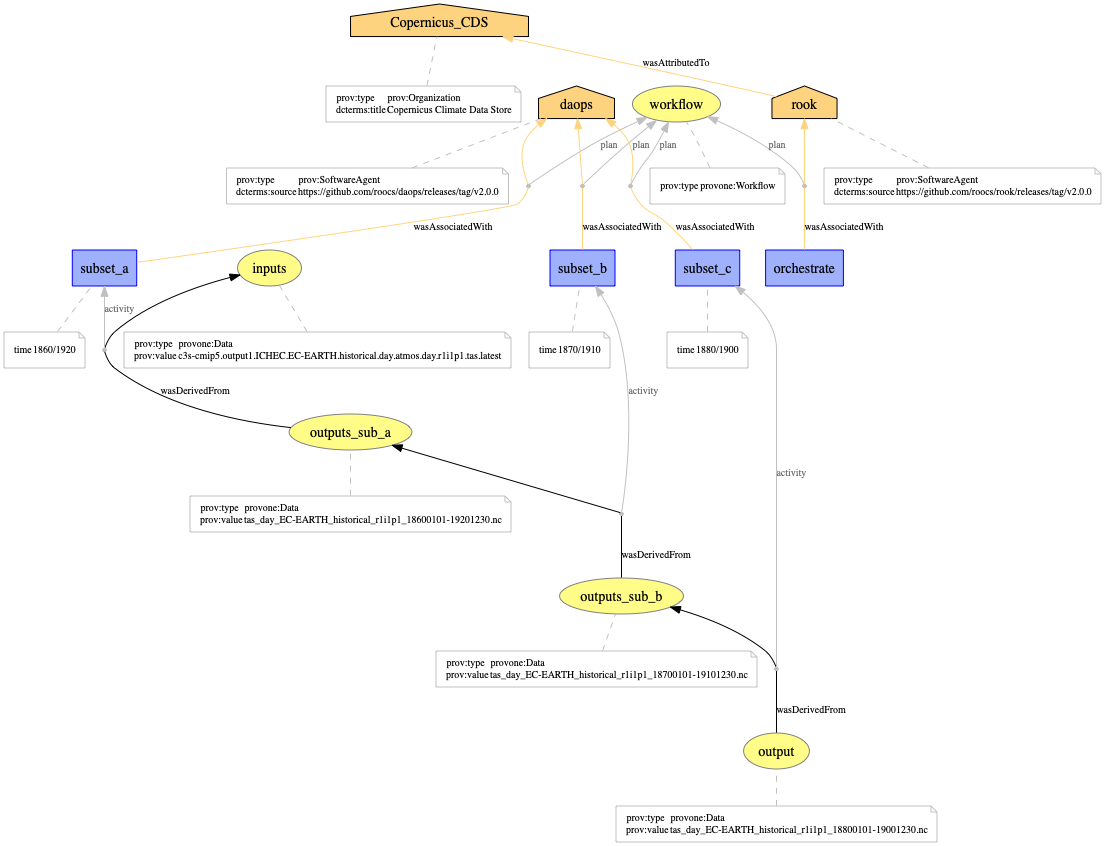

In [4]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("roocs_demo_prov.png")

from IPython.display import Image
Image("roocs_demo_prov.png")